In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np
from itertools import product
import seaborn as sns
sns.set()

%matplotlib inline

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
def get_fte_bte(err, ntrees, cv):
    bte = [[] for i in range(10)]
    te = [[] for i in range(10)]
    fte = []
    
    single_err = unpickle('/data/Jayanta/continual-learning/crossval_res_singletask/'+'LF_single_task_'+str(ntrees)+'__'+str(cv+1)+'.pickle')
    print('/data/Jayanta/continual-learning/crossval_res_singletask/'+'LF_single_task_'+str(ntrees)+'__'+str(cv+1)+'.pickle')
    for i in range(10):
        for j in range(i,10):
            #print(err[j][i],j,i)
            bte[i].append(err[i][i]/err[j][i])
            te[i].append(single_err[i]/err[j][i])
                
    for i in range(10):
        #print(single_err[i],err[i][i])
        fte.append(single_err[i]/err[i][i])
            
            
    return fte,bte,te

In [3]:
def calc_mean_bte(btes,task_num=10,cv=6):
    mean_bte = [[] for i in range(task_num)]


    for j in range(task_num):
        tmp = 0
        for i in range(cv):
            tmp += np.array(btes[i][j])
        
        tmp=tmp/cv
        mean_bte[j].extend(tmp)
            
    return mean_bte     

In [4]:
def calc_mean_te(tes,task_num=10,cv=6):
    mean_te = [[] for i in range(task_num)]

    for j in range(task_num):
        tmp = 0
        for i in range(cv):
            tmp += np.array(tes[i][j])
        
        tmp=tmp/cv
        mean_te[j].extend(tmp)
            
    return mean_te 

In [5]:
def calc_mean_fte(ftes,task_num=10,cv=6):
    fte = np.asarray(ftes)
    
    return list(np.mean(np.asarray(fte_tmp),axis=0))

In [6]:
def calc_mean_err(err,task_num=10,cv=6):
    mean_err = [[] for i in range(task_num)]


    for j in range(task_num):
        tmp = 0
        for i in range(cv):
            tmp += np.array(err[i][j])
        
        tmp=tmp/cv
        print(tmp)
        mean_err[j].extend([tmp])
            
    return mean_err     

In [19]:
ntrees = 41
cvs = 6
alg_num = 1
task_num = 10

btes = [[] for i in range(task_num)]
ftes = [[] for i in range(task_num)]
tes = [[] for i in range(task_num)]
err_ = [[] for i in range(task_num)]

te_tmp = [[] for _ in range(cvs)]
bte_tmp = [[] for _ in range(cvs)]
fte_tmp = [[] for _ in range(cvs)]
err_tmp = [[] for _ in range(cvs)]
    
for cv in range(cvs):
    
    filename = '/data/Jayanta/continual-learning/crossval_res/'+'LF_'+str(ntrees)+'__'+str(cv+1)+'.pickle'
    print(filename)
    err = unpickle(filename)
    fte, bte, te = get_fte_bte(err,ntrees,cv)
    
    err_ = [[] for i in range(task_num)]
    for i in range(task_num):
        for j in range(task_num-i):
            #print(err[i+j][i])
            err_[i].append(err[i+j][i])
            
    te_tmp[cv].extend(te)
    bte_tmp[cv].extend(bte)
    fte_tmp[cv].extend(fte)
    err_tmp[cv].extend(err_)
    

te = calc_mean_te(te_tmp)
bte = calc_mean_bte(bte_tmp)
fte = calc_mean_fte(fte_tmp)
error = calc_mean_err(err_tmp)

/data/Jayanta/continual-learning/crossval_res/LF_41__1.pickle
/data/Jayanta/continual-learning/crossval_res_singletask/LF_single_task_41__1.pickle
/data/Jayanta/continual-learning/crossval_res/LF_41__2.pickle
/data/Jayanta/continual-learning/crossval_res_singletask/LF_single_task_41__2.pickle
/data/Jayanta/continual-learning/crossval_res/LF_41__3.pickle
/data/Jayanta/continual-learning/crossval_res_singletask/LF_single_task_41__3.pickle
/data/Jayanta/continual-learning/crossval_res/LF_41__4.pickle
/data/Jayanta/continual-learning/crossval_res_singletask/LF_single_task_41__4.pickle
/data/Jayanta/continual-learning/crossval_res/LF_41__5.pickle
/data/Jayanta/continual-learning/crossval_res_singletask/LF_single_task_41__5.pickle
/data/Jayanta/continual-learning/crossval_res/LF_41__6.pickle
/data/Jayanta/continual-learning/crossval_res_singletask/LF_single_task_41__6.pickle
[0.5265     0.51683333 0.516      0.51133333 0.513      0.512
 0.51283333 0.51066667 0.51233333 0.51116667]
[0.5771666

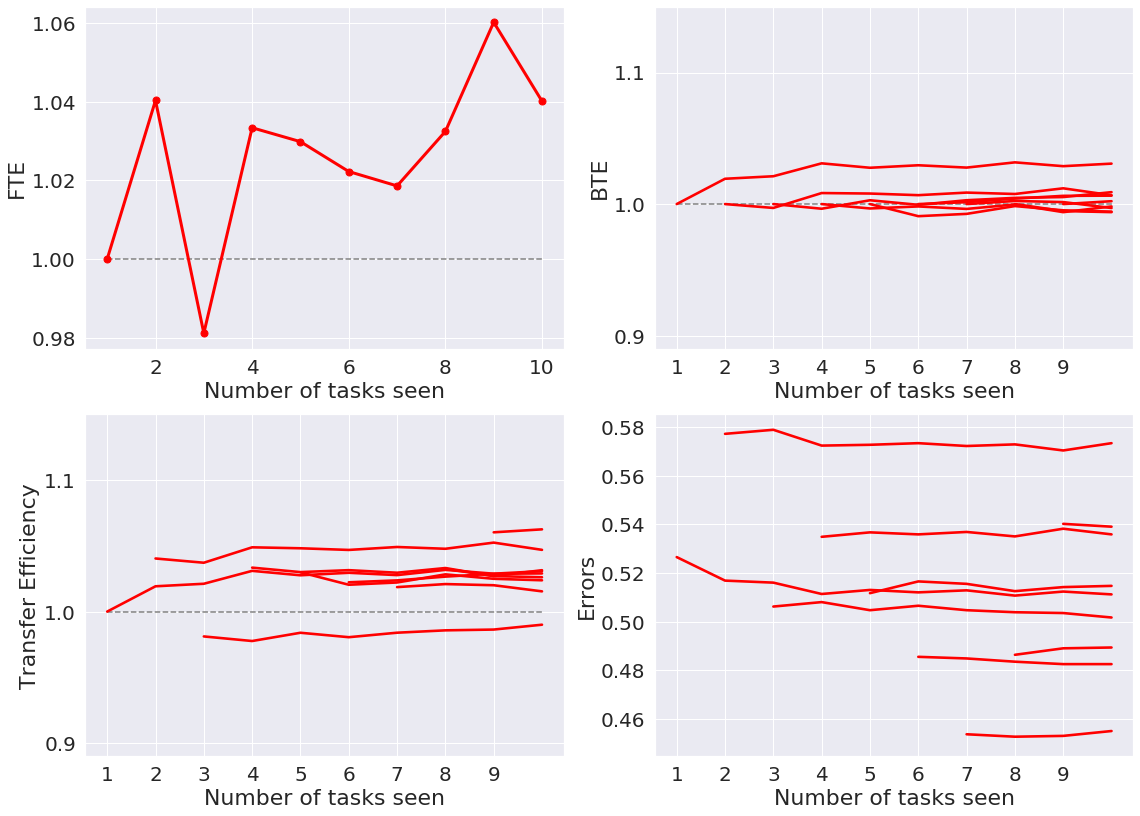

In [20]:
sns.set()

clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=22
ticksize=20

fig, ax = plt.subplots(2,2, figsize=(16,11.5))
#fig.suptitle('ntrees = '+str(ntrees),fontsize=25)
ax[0][0].plot(np.arange(1,11), fte, c='red', marker='.', markersize=14, linewidth=3)
ax[0][0].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)
ax[0][0].tick_params(labelsize=ticksize)
ax[0][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][0].set_ylabel('FTE', fontsize=fontsize)

n_tasks=10
for i in range(n_tasks):

    et = np.asarray(bte[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[0][1].plot(ns, et, c='red', linewidth = 2.6)
    
ax[0][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][1].set_ylabel('BTE', fontsize=fontsize)
ax[0][1].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[0][1].set_xticks(np.arange(1,10))
ax[0][1].set_ylim(0.89, 1.15)
ax[0][1].tick_params(labelsize=ticksize)
ax[0][1].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)


n_tasks=10
for i in range(n_tasks):

    et = np.asarray(te[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[1][0].plot(ns, et, c='red', linewidth = 2.6)
    
ax[1][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][0].set_ylabel('Transfer Efficiency', fontsize=fontsize)
ax[1][0].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[1][0].set_xticks(np.arange(1,10))
ax[1][0].set_ylim(0.89, 1.15)
ax[1][0].tick_params(labelsize=ticksize)
ax[1][0].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)


n_tasks=10
for i in range(n_tasks):

    et = np.asarray(error[i])
    ns = np.arange(i + 1, n_tasks + 1)
    ax[1][1].plot(ns, et[0], c='red', linewidth = 2.6)
    
ax[1][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][1].set_ylabel('Errors', fontsize=fontsize)
#ax[1][1].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[1][1].set_xticks(np.arange(1,10))
#ax[1][1].set_ylim(0.89, 1.15)
ax[1][1].tick_params(labelsize=ticksize)

plt.savefig('/data/Jayanta/fig_trees'+str(ntrees)+'.png',dpi=300)

In [227]:
fte_tmp

[[1.0,
  1.0055762081784385,
  0.9830866807610994,
  1.0166975881261597,
  1.0,
  1.020790020790021,
  0.9896265560165975,
  1.0106837606837606,
  1.0461538461538462,
  1.0439814814814812],
 [1.0,
  1.0233812949640286,
  0.9978858350951374,
  1.001926782273603,
  0.9961089494163424,
  1.0277185501066097,
  0.9888641425389755,
  0.9960079840319361,
  1.033009708737864,
  1.0069767441860464],
 [1.0,
  1.0229276895943564,
  0.9461077844311376,
  1.0247148288973382,
  1.0333333333333334,
  1.0224215246636772,
  0.9867256637168141,
  1.033259423503326,
  1.016759776536313,
  1.0307692307692309],
 [1.0,
  0.993006993006993,
  0.9860557768924303,
  1.0471512770137523,
  0.9960629921259843,
  0.9939393939393939,
  0.9678899082568807,
  1.0185950413223142,
  1.0076775431861804,
  1.0112612612612613],
 [1.0,
  1.0604982206405693,
  0.9770354906054279,
  1.0246679316888045,
  1.002004008016032,
  0.9563318777292577,
  1.0570776255707763,
  0.9747899159663865,
  1.0802238805970148,
  1.04337899543